In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


import scipy
import glob
import os
import scipy.io as sio
import numpy as np
import cv2
from matplotlib import pyplot as plt
import util.gaze

In [2]:
print(os.getcwd())

/home/david/github/GazeEstimation


In [3]:
mpii_dir = '../datasets/MPIIGaze'
eval_files = glob.glob('../datasets/MPIIGaze/Evaluation Subset/sample list for eye image/*.txt')
eval_files = sorted(eval_files)

In [4]:
print(eval_files)

['./datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p00.txt', './datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p01.txt', './datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p02.txt', './datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p03.txt', './datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p04.txt', './datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p05.txt', './datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p06.txt', './datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p07.txt', './datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p08.txt', './datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p09.txt', './datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p10.txt', './datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p11.txt', './datasets/MPIIGaze/Evaluation Subset/sample list for eye image/p12.txt', './datasets/MPIIGaze/Eva

In [5]:
eval_img_list = []
for ef in eval_files:
    person = os.path.splitext(os.path.basename(ef))[0]
    with open(ef) as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            if line != '':
                img_path, side = [x.strip() for x in line.split()]
                day, img = img_path.split('/')
                
                eval_img_list.append({
                    'day': day,
                    'img_name': img,
                    'person': person,
                    'side': side
                })

print(eval_img_list[:3])

[{'day': 'day08', 'img_name': '0069.jpg', 'person': 'p00', 'side': 'left'}, {'day': 'day28', 'img_name': '0646.jpg', 'person': 'p00', 'side': 'left'}, {'day': 'day04', 'img_name': '0900.jpg', 'person': 'p00', 'side': 'left'}]


./datasets/MPIIGaze/Data/Normalized/p00/day08.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day28.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day04.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day12.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day35.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day17.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day02.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day03.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day36.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day38.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day22.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day17.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day20.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day25.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day17.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day29.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day35.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day24.mat
left
./datasets

left
./datasets/MPIIGaze/Data/Normalized/p00/day13.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day23.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day01.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day16.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day22.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day12.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day06.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day29.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day38.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day24.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day09.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day10.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day03.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day29.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day27.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day12.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day01.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day35.mat
left
./dat

./datasets/MPIIGaze/Data/Normalized/p00/day17.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day15.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day11.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day09.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day25.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day19.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day30.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day34.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day11.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day15.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day13.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day38.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day27.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day17.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day28.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day08.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day27.mat
left
./datasets/MPIIGaze/Data/Normalized/p00/day16.mat
left
./datasets

(3,)
(36, 60)
[0.0443683  2.91182681]
1.0


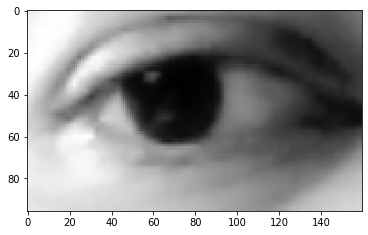

In [6]:
for entry in eval_img_list:
    mat_path = os.path.join(mpii_dir, 'Data/Normalized', entry['person'], entry['day'] + '.mat')
    print(mat_path)
    side = entry['side']
    print(side)
    
    if side == 'right':
        mat = sio.loadmat(mat_path)

        filenames = mat['filenames']
        i = np.argwhere(filenames == entry['img_name'])[0][0]

        gaze = mat['data'][side][0, 0]['gaze'][0, 0][i]
        gaze[0] = -gaze[0]
        image = mat['data'][side][0, 0]['image'][0, 0][i]
        print(gaze.shape)
        print(image.shape)

        image = cv2.resize(image, (160, 96))
        image = cv2.equalizeHist(image)
        image = image / 255.
        image = image.astype(np.float32)

        gaze = util.gaze.vector_to_pitchyaw(gaze.reshape((1, 3))).flatten()

        print(gaze)
        entry['img'] = image
        entry['gaze'] = gaze

        plt.imshow(image, cmap='gray')
        print(np.max(image))
    break
